In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [163]:
df = pd.read_csv('./fifa21 raw data v2.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

C:\Users\FzoOT\AppData\Local\Temp\ipykernel_4248\1439224463.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./fifa21 raw data v2.csv')


In [164]:
df[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,€103.5M,€560K,€138.4M
1,€63M,€220K,€75.9M
2,€120M,€125K,€159.4M
3,€129M,€370K,€161M
4,€132M,€270K,€166.5M
...,...,...,...
18974,€100K,€1K,€70K
18975,€130K,€500,€165K
18976,€120K,€500,€131K
18977,€100K,€2K,€88K


In [165]:
import re

def clean_value(value):
    value = value.replace('€', '')
    if 'M' in value:
        value = re.sub(r'[^\d.]', '', value)  # Remove non-numeric characters except the decimal point
        value = float(value) * 1_000_000  # Convert 'M' to '000000'
    elif 'K' in value:
        value = re.sub(r'[^\d.]', '', value)  # Remove characters except the decimal point
        value = float(value) * 1_000  # Convert 'K' to '000'
    return '{:,.0f}'.format(float(value))  # Format the result with thousands separator

columns_to_clean = ['Value', 'Wage', 'Release Clause']
for column in columns_to_clean:
    df[column] = df[column].apply(clean_value)


df[columns_to_clean] = df[columns_to_clean].replace({',': ''}, regex=True)

df[columns_to_clean] = df[columns_to_clean].apply(pd.to_numeric, errors='coerce')


df[['Value','Wage','Release Clause']].dtypes

print(df['Release Clause'][0]+df['Wage'][0])

138960000


In [166]:
df[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,103500000,560000,138400000
1,63000000,220000,75900000
2,120000000,125000,159400000
3,129000000,370000,161000000
4,132000000,270000,166500000
...,...,...,...
18974,100000,1000,70000
18975,130000,500,165000
18976,120000,500,131000
18977,100000,2000,88000


In [167]:
# Example code for a line plot
#plt.figure(figsize=(10, 6))
#plt.plot(df['Value'], label='Value')
#plt.plot(df['Release Clause'], label='Release Clause')
#plt.xlabel('Index')
#plt.ylabel('Values')
#plt.title('Trends in Value and Release Clause')
#plt.legend()
#plt.show()

In [168]:
(df['Release Clause'] == 0).sum()


1261

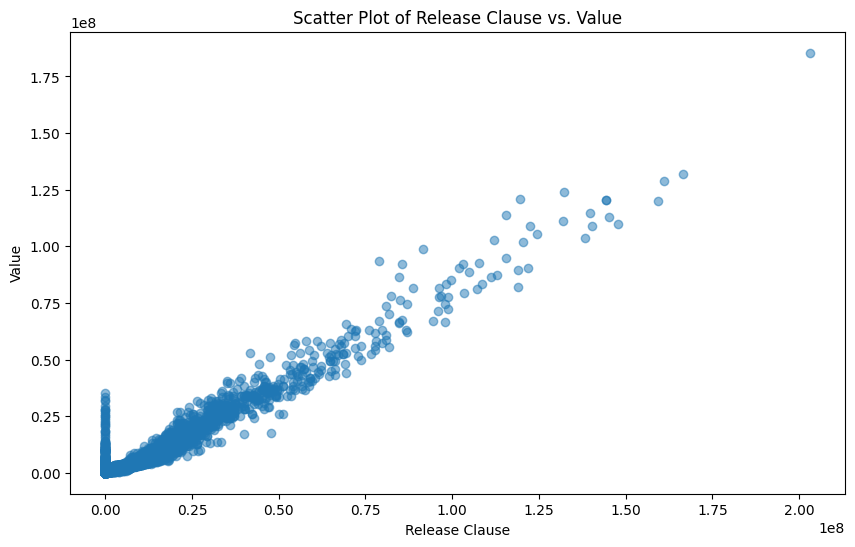

In [169]:
# Example code for a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Release Clause'], df['Value'], alpha=0.5)
plt.xlabel('Release Clause')
plt.ylabel('Value')
plt.title('Scatter Plot of Release Clause vs. Value')
plt.show()

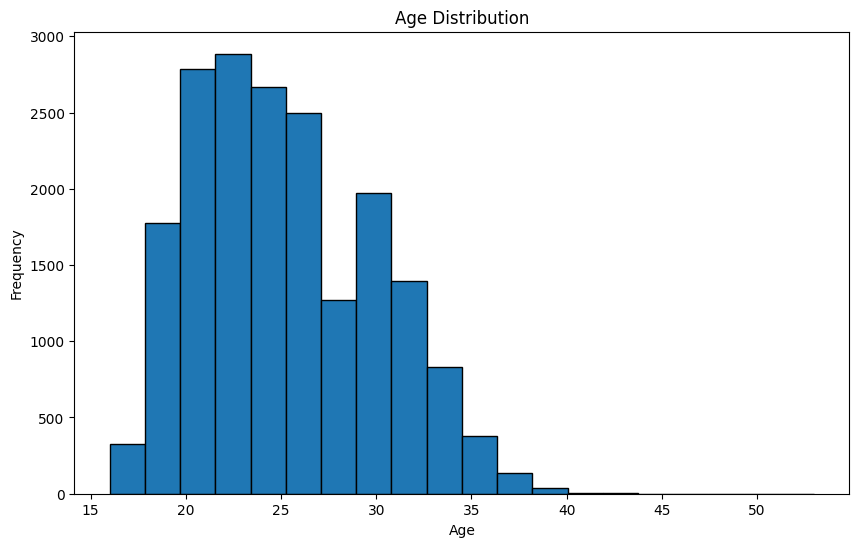

In [170]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

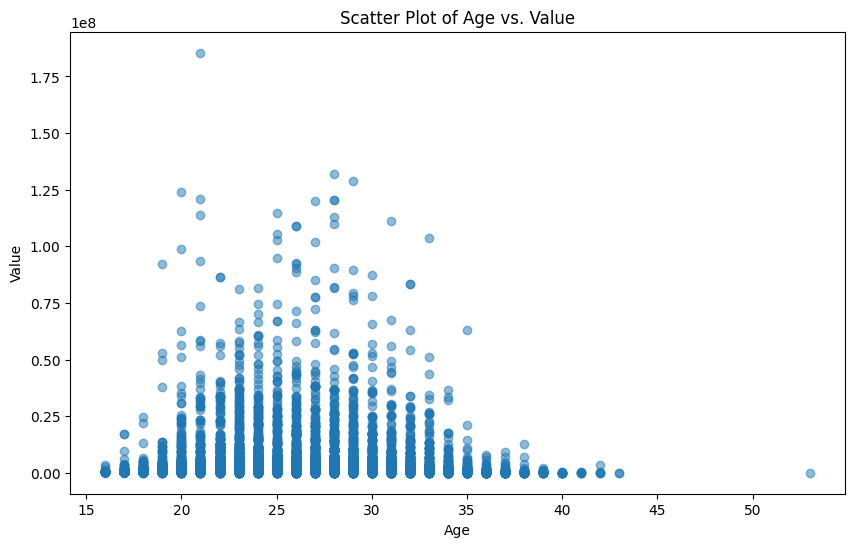

In [171]:
# Example code for a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Value'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Scatter Plot of Age vs. Value')
plt.show()

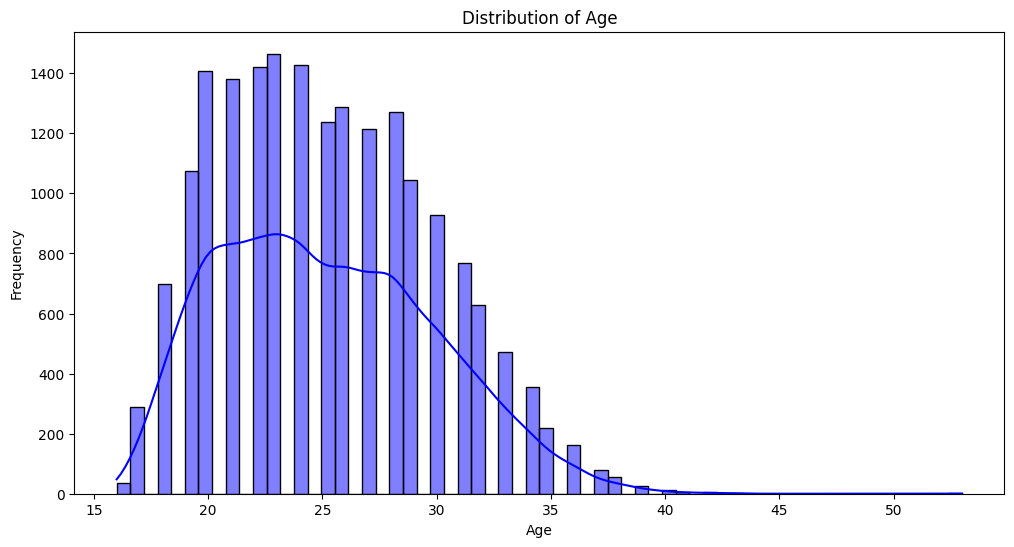

In [172]:

# Create a histogram for Age
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.show()

In [173]:
df["Club"] = df["Club"].map(lambda x: x.replace("\n", ""))


In [174]:
club_values = df.groupby('Club')['Value'].sum()

# Sort the clubs in descending order of total value
top_10_clubs = club_values.sort_values(ascending=False).head(10)

# Display the top 10 clubs with the highest valued players
print(top_10_clubs)



Club
Liverpool              1276325000
Manchester City        1187650000
Real Madrid            1187275000
FC Barcelona            969000000
Paris Saint-Germain     961600000
FC Bayern München       945500000
Manchester United       894880000
Chelsea                 888625000
Tottenham Hotspur       868550000
Atlético Madrid         830300000
Name: Value, dtype: int64


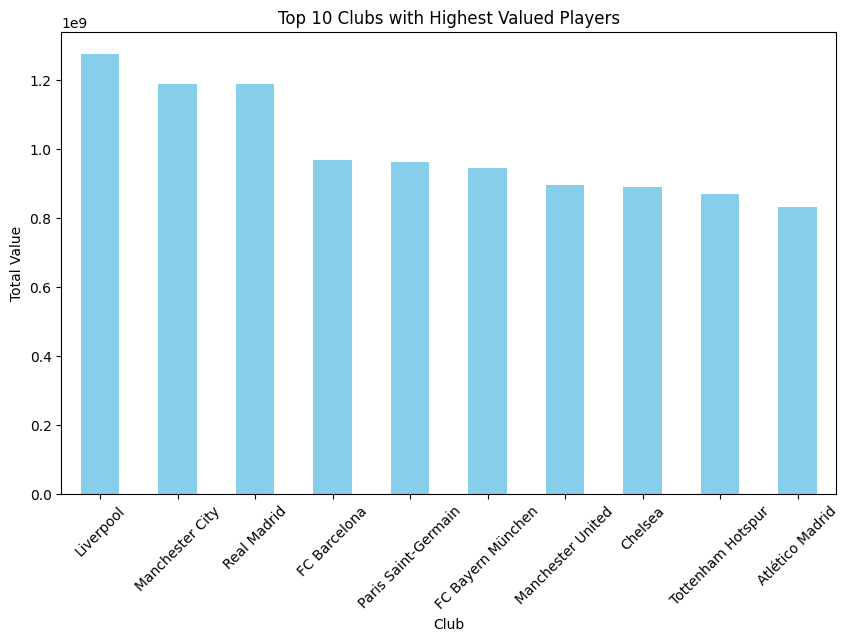

In [175]:

# Create a bar plot for the top 10 clubs
plt.figure(figsize=(10, 6))
top_10_clubs.plot(kind='bar', color='skyblue')
plt.xlabel('Club')
plt.ylabel('Total Value')
plt.title('Top 10 Clubs with Highest Valued Players')
plt.xticks(rotation=45)
plt.show()

C:\Users\FzoOT\AppData\Local\Temp\ipykernel_4248\604729059.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette='viridis')


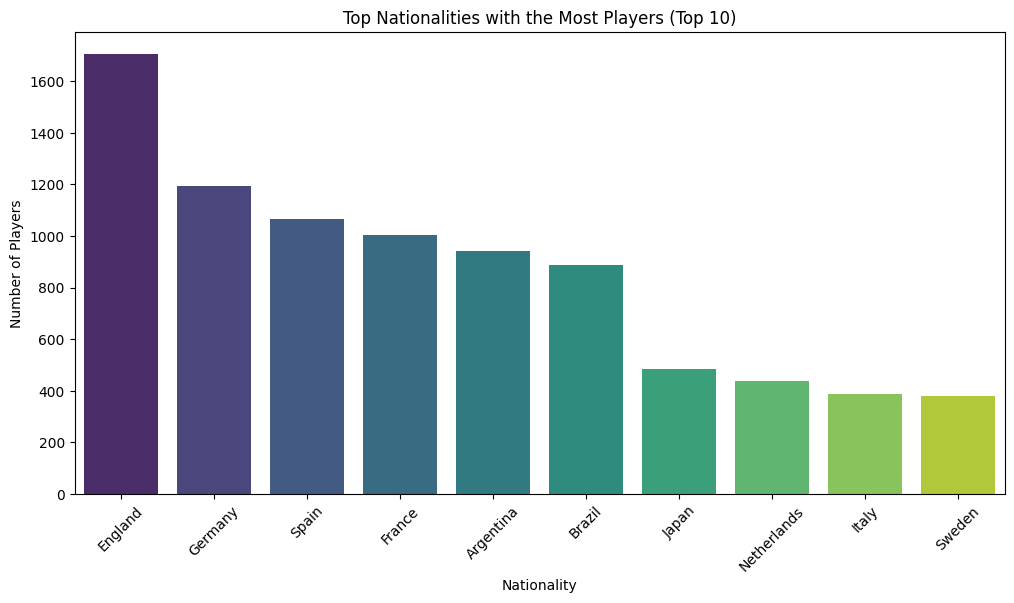

In [176]:
# Count the number of players from each nationality
nationality_counts = df['Nationality'].value_counts()

# Select the top N nationalities (e.g., top 10) for better visualization
top_nationalities = nationality_counts.head(10)

# Create a bar plot or countplot for the top N nationalities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette='viridis')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.title('Top Nationalities with the Most Players (Top 10)')
plt.xticks(rotation=45)
plt.show()